Forecasting two dependent random variables involves capturing the relationship between them. One common approach is to use a Vector Autoregression (VAR) model, which is a multivariate time series model that can capture the linear interdependencies among multiple time series.

Here’s how you can perform forecasting with two dependent normally distributed variables using a VAR model:

,Forecasted x,Forecasted z
0,99.731529,9.749037
1,100.287342,10.149955
2,99.285863,9.479476
3,100.325236,10.068178
4,99.759932,9.956492
5,100.045738,10.161838
6,99.771512,9.834239
7,100.097204,10.139882
8,99.866434,9.936786
9,99.951690,10.005495


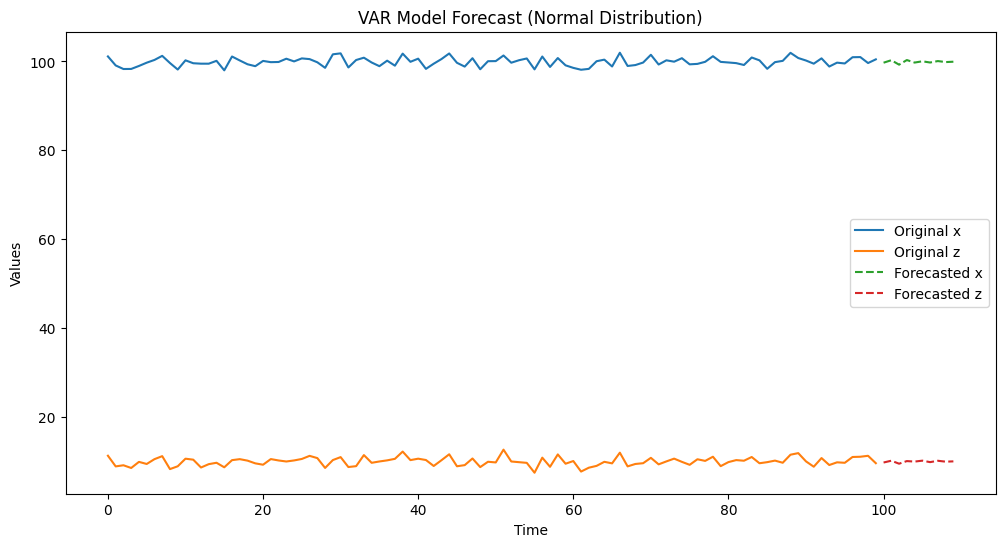

In [115]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Step 1: Generate two correlated normally distributed random variables
n = 100
mean = [100, 10]
cov = [[1, 0.8], [0.8, 1]]  # Diagonal covariance matrix with correlation coefficient 0.8
x, z = np.random.multivariate_normal(mean, cov, n).T

# Combine the data into a DataFrame
data = np.column_stack((x, z))
df = pd.DataFrame(data, columns=['x', 'z'])

# Step 2: Fit a VAR model
model = VAR(df)
fitted_model = model.fit(maxlags=5)

# Step 3: Forecast future values
forecast_length = 10
forecast = fitted_model.forecast(df.values[-fitted_model.k_ar:], steps=forecast_length)

# Display the forecasted values
forecast_df = pd.DataFrame(forecast, columns=['Forecasted x', 'Forecasted z'])

display(forecast_df)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['x'], label='Original x')
plt.plot(df['z'], label='Original z')
plt.plot(np.arange(len(df), len(df) + forecast_length), forecast[:, 0], label='Forecasted x', linestyle='--')
plt.plot(np.arange(len(df), len(df) + forecast_length), forecast[:, 1], label='Forecasted z', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('VAR Model Forecast (Normal Distribution)')
plt.legend()
plt.show()


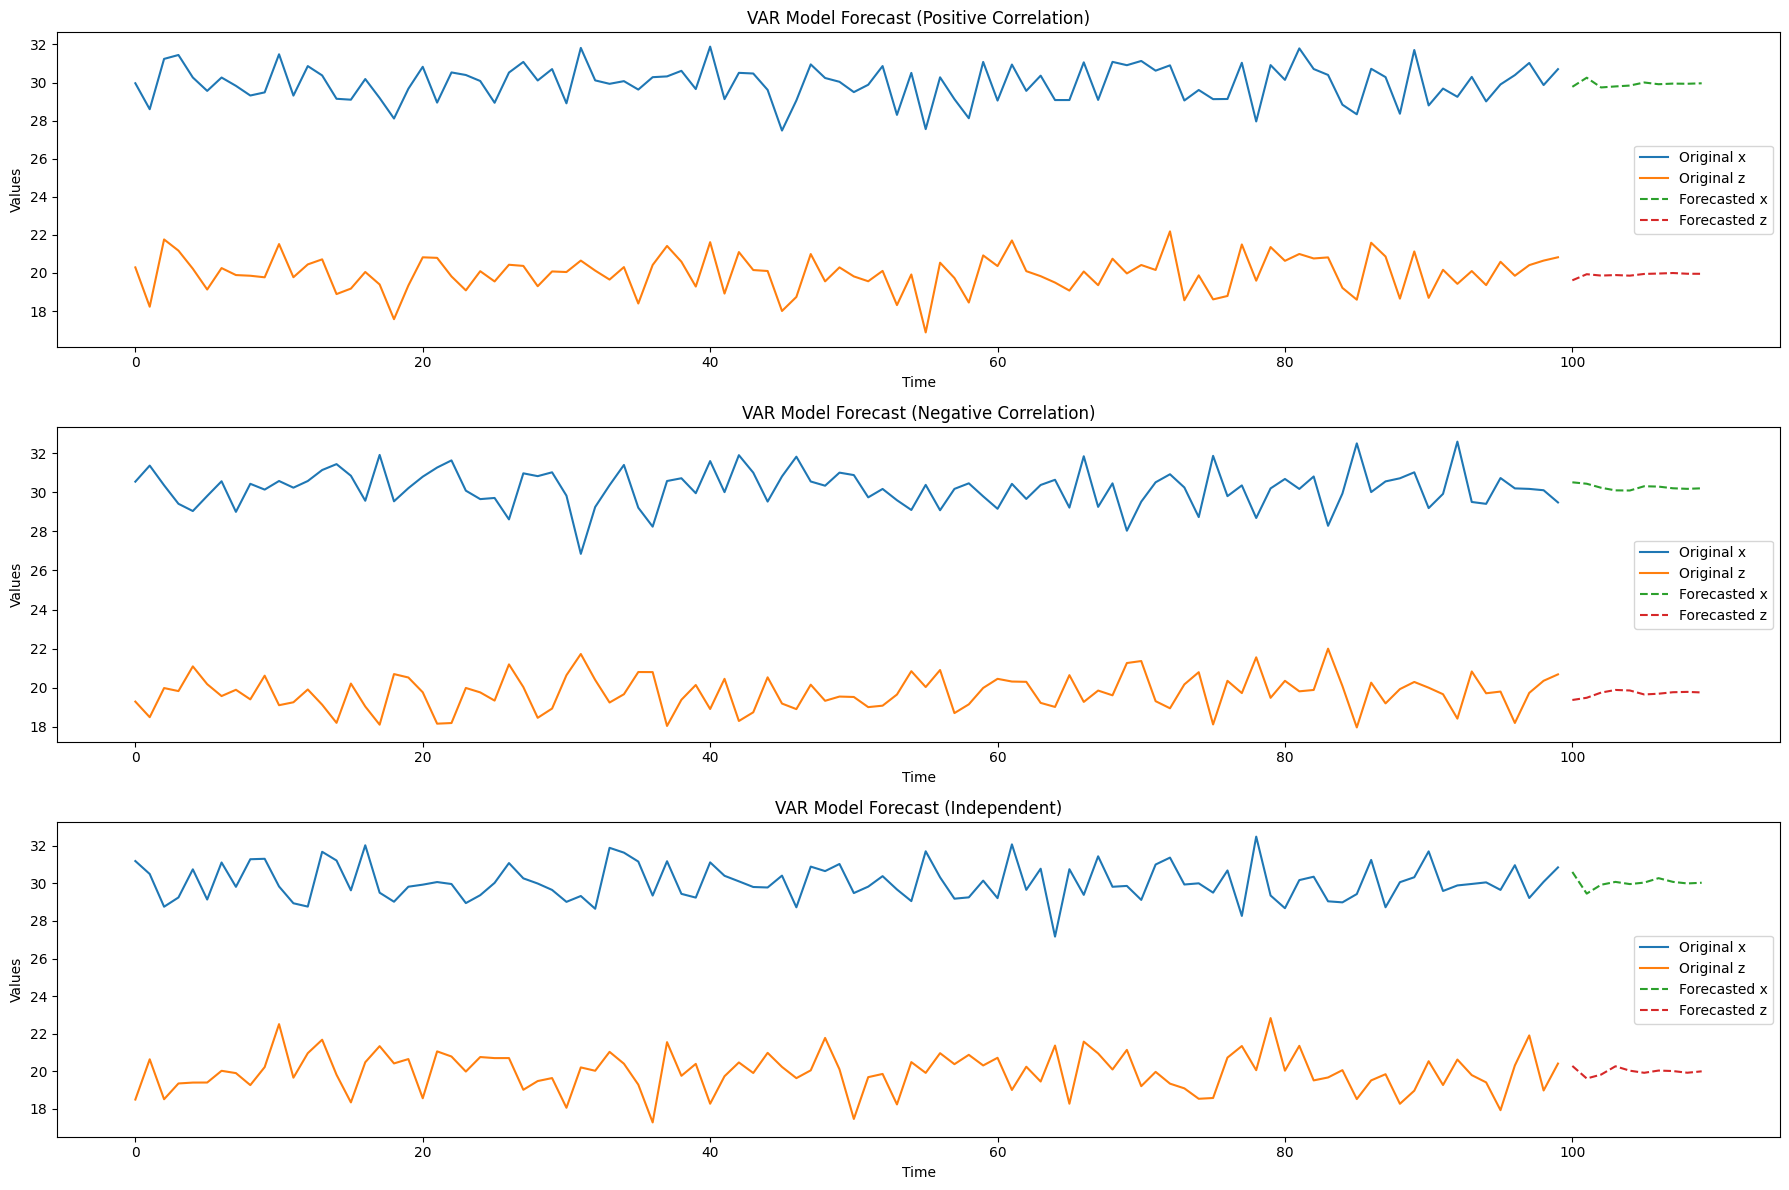

In [116]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

def generate_data(mean, cov, n):
    x, z = np.random.multivariate_normal(mean, cov, n).T
    return x, z

def fit_var_model(x, z):
    data = np.column_stack((x, z))
    df = pd.DataFrame(data, columns=['x', 'z'])
    model = VAR(df)
    fitted_model = model.fit(maxlags=5)
    return fitted_model, df

def forecast_values(fitted_model, df, forecast_length=10):
    forecast = fitted_model.forecast(df.values[-fitted_model.k_ar:], steps=forecast_length)
    return forecast

def plot_forecast(df, forecast, title):
    plt.plot(df['x'], label='Original x')
    plt.plot(df['z'], label='Original z')
    plt.plot(np.arange(len(df), len(df) + len(forecast)), forecast[:, 0], label='Forecasted x', linestyle='--')
    plt.plot(np.arange(len(df), len(df) + len(forecast)), forecast[:, 1], label='Forecasted z', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()

# Parameters
n = 100
mean = [30, 20]
forecast_length = 10

# Positively correlated
cov_positive = [[1, 0.8], [0.8, 1]]
x_pos, z_pos = generate_data(mean, cov_positive, n)
fitted_model_pos, df_pos = fit_var_model(x_pos, z_pos)
forecast_pos = forecast_values(fitted_model_pos, df_pos, forecast_length)

# Negatively correlated
cov_negative = [[1, -0.8], [-0.8, 1]]
x_neg, z_neg = generate_data(mean, cov_negative, n)
fitted_model_neg, df_neg = fit_var_model(x_neg, z_neg)
forecast_neg = forecast_values(fitted_model_neg, df_neg, forecast_length)

# Independent
cov_indep = [[1, 0], [0, 1]]
x_indep, z_indep = generate_data(mean, cov_indep, n)
fitted_model_indep, df_indep = fit_var_model(x_indep, z_indep)
forecast_indep = forecast_values(fitted_model_indep, df_indep, forecast_length)

# Plotting
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
plot_forecast(df_pos, forecast_pos, 'VAR Model Forecast (Positive Correlation)')

plt.subplot(3, 1, 2)
plot_forecast(df_neg, forecast_neg, 'VAR Model Forecast (Negative Correlation)')

plt.subplot(3, 1, 3)
plot_forecast(df_indep, forecast_indep, 'VAR Model Forecast (Independent)')

plt.tight_layout()
plt.show()


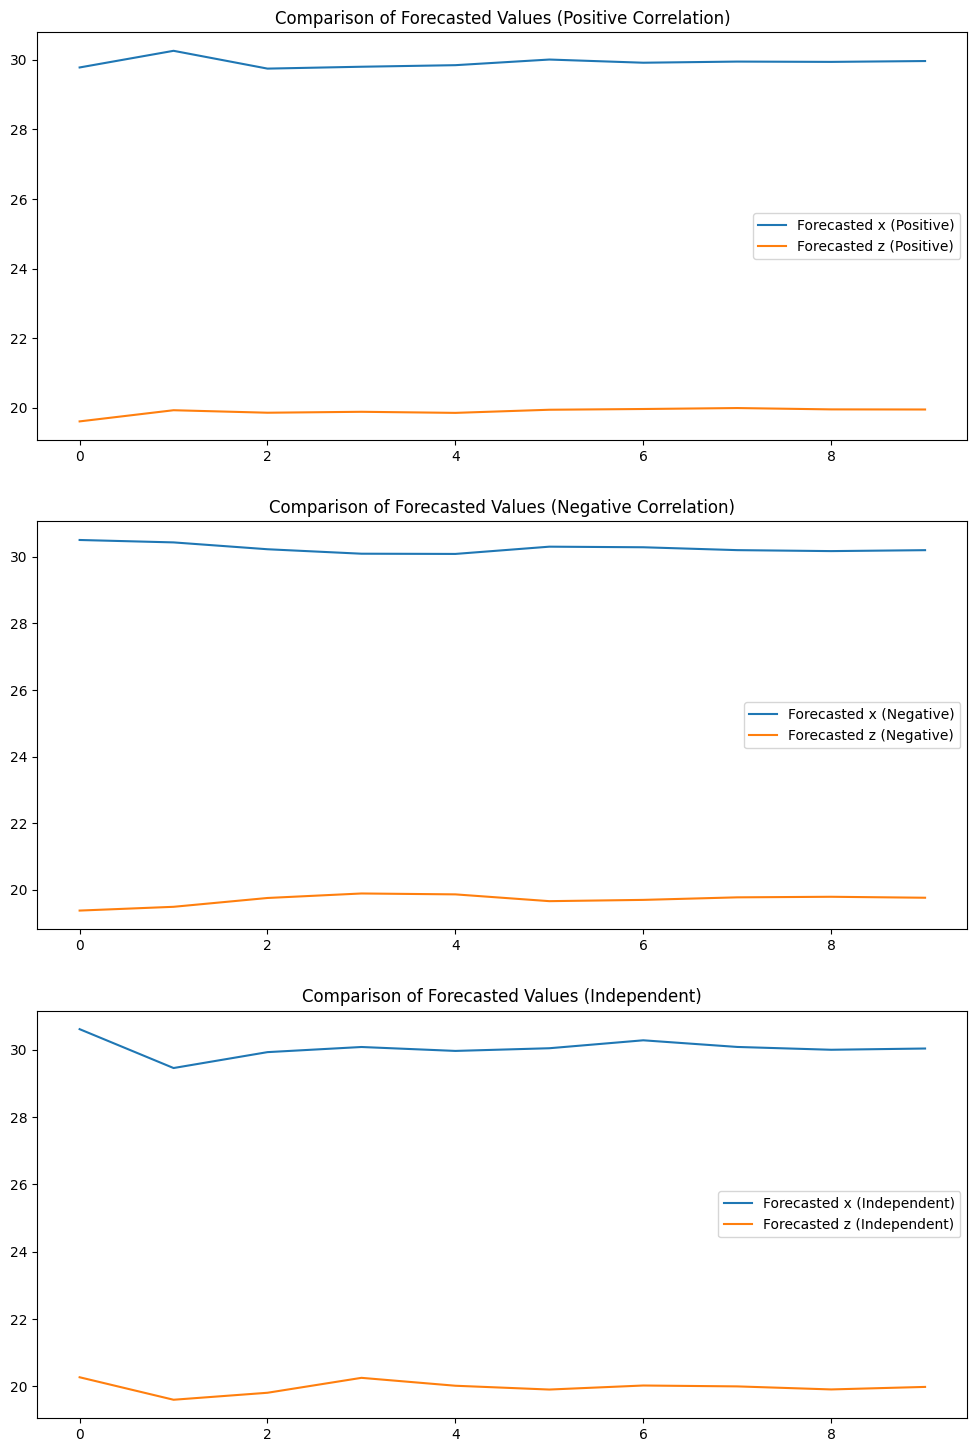

In [117]:
# Combine forecasted values into a single dataframe for comparison

forecast_df_pos = pd.DataFrame(forecast_pos, columns=['Forecasted x (Positive)', 'Forecasted z (Positive)'])
forecast_df_neg = pd.DataFrame(forecast_neg, columns=['Forecasted x (Negative)', 'Forecasted z (Negative)'])
forecast_df_indep = pd.DataFrame(forecast_indep, columns=['Forecasted x (Independent)', 'Forecasted z (Independent)'])

# combined_forecast_df = pd.concat([forecast_df_pos, forecast_df_neg, forecast_df_indep], axis=1)
# display(combined_forecast_df)

fig, axs = plt.subplots(3, 1, figsize=(12, 18))
forecast_df_pos.plot(ax=axs[0], title='Comparison of Forecasted Values (Positive Correlation)')
forecast_df_neg.plot(ax=axs[1], title='Comparison of Forecasted Values (Negative Correlation)')
forecast_df_indep.plot(ax=axs[2], title='Comparison of Forecasted Values (Independent)')

plt.show()